## Importe de dependencias y funciones

In [1]:
!pip install --pre pycaret

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB

In [17]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def preprocess_data(data):
  #We will remove all de prices above 0
  print("Dataset size: ", (data.shape))
  data  = data[((data['price'] > 0))]
  print("Only positive prices: ",data.shape)
  # Supongamos que tienes un DataFrame df con las variables categóricas
  categorical_columns = ['cut', 'color', 'clarity']
  numeric_columns = ["depth", "table", "carat",'x', 'y', 'z','price']
  # Supongamos que tienes un DataFrame df con las variables categóricas
  categorical_columns = ['cut', 'color', 'clarity']
  numeric_columns = ["depth", "table", "carat",'x', 'y', 'z','price']

  # Crea un nuevo DataFrame solo con las variables numéricas
  numeric_data = df[numeric_columns]

  # # NUMERIC SCALAR
  scaler = StandardScaler().fit(numeric_data)
  scaled_numeric_data = scaler.transform(numeric_data)

  # Crea un DataFrame con las variables numéricas escaladas y las variables categóricas sin cambios
  df_scaled = pd.DataFrame(numeric_data, columns=numeric_columns)
  for column in categorical_columns:
      df_scaled[column] = df[column]
  # Reordena las columnas para que el DataFrame resultante tenga el mismo orden que el original
  df_scaled = df_scaled[df.columns]

  # Crea una instancia de LabelEncoder
  encoder = LabelEncoder()
  df_encoded= df_scaled.copy()

  # Aplica el LabelEncoder a cada columna categórica
  for col in categorical_columns:
      df_encoded[col] = encoder.fit_transform(df[col])

  # Ahora las variables categóricas han sido codificadas con números enteros

  from sklearn.model_selection import train_test_split
  # Dividir los datos en conjuntos de entrenamiento y prueba
  df_x  = df_encoded.drop(columns= "price")
  df_y  = pd.DataFrame(df_encoded.price)
  #X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
  return df_x, df_y


## Dataset initiation

In [3]:
# Reemplaza 'archivo.csv' con el nombre de tu archivo CSV
df = pd.read_csv("/diamonds.csv")
df_newdata = df.sample(frac=0.1, random_state=42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Calcular la media de la columna "price"
media_price = df['price'].mean()

# Calcular la varianza de la columna "price"
std_price = df['price'].std()

print("Media de 'price':", media_price)
print("STD de 'price':", std_price)
print("max:", df['price'].max())
print("min:", df['price'].min())
#We will remove all de prices equals -1
print("N° -1: ", (df['price']== -1).value_counts())
df  = df[~ (df['price']== -1)]
print(df.shape)

Media de 'price': 3925.5394
STD de 'price': 3975.45212004363
max: 18787
min: -1
N° -1:  price
False    4990
True       10
Name: count, dtype: int64
(4990, 10)


In [5]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [6]:
for columns in df.columns :
  print(df[columns].isnull().value_counts())
  #Ninguno tiene archivos nulos
  print(df[columns].nunique())

carat
False    4990
Name: count, dtype: int64
202
cut
False    4990
Name: count, dtype: int64
5
color
False    4990
Name: count, dtype: int64
7
clarity
False    4990
Name: count, dtype: int64
8
depth
False    4990
Name: count, dtype: int64
121
table
False    4990
Name: count, dtype: int64
78
price
False    4990
Name: count, dtype: int64
3178
x
False    4990
Name: count, dtype: int64
474
y
False    4990
Name: count, dtype: int64
471
z
False    4990
Name: count, dtype: int64
304


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,0.794409,61.711062,57.446553,3933.408216,5.725084,5.727673,3.532970
std,0.468388,1.445500,2.259633,3975.541768,1.119085,1.112017,0.690183
min,0.230000,44.000000,51.600000,351.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.525000
75%,1.040000,62.500000,59.000000,5377.500000,6.540000,6.537500,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


### Preprocesisng categorical features

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

#CODED COLUMNS
#Appling scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes un DataFrame df con las variables categóricas
categorical_columns = ['cut', 'color', 'clarity']
numeric_columns = ["depth", "table", "carat",'x', 'y', 'z','price']

# Crea un nuevo DataFrame solo con las variables numéricas
numeric_data = df[numeric_columns]

# # NUMERIC SCALAR
scaler = StandardScaler().fit(numeric_data)
scaled_numeric_data = scaler.transform(numeric_data)

# Crea un DataFrame con las variables numéricas escaladas y las variables categóricas sin cambios
df_scaled = pd.DataFrame(numeric_data, columns=numeric_columns)
for column in categorical_columns:
    df_scaled[column] = df[column]
# Reordena las columnas para que el DataFrame resultante tenga el mismo orden que el original
df_scaled = df_scaled[df.columns]

# Crea una instancia de LabelEncoder
encoder = LabelEncoder()
df_encoded= df_scaled.copy()

# Aplica el LabelEncoder a cada columna categórica
for col in categorical_columns:
    df_encoded[col] = encoder.fit_transform(df[col])

# Ahora las variables categóricas han sido codificadas con números enteros

from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba
df_x  = df_encoded.drop(columns= "price")
df_y  = pd.DataFrame(df_encoded.price)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)


<Axes: >

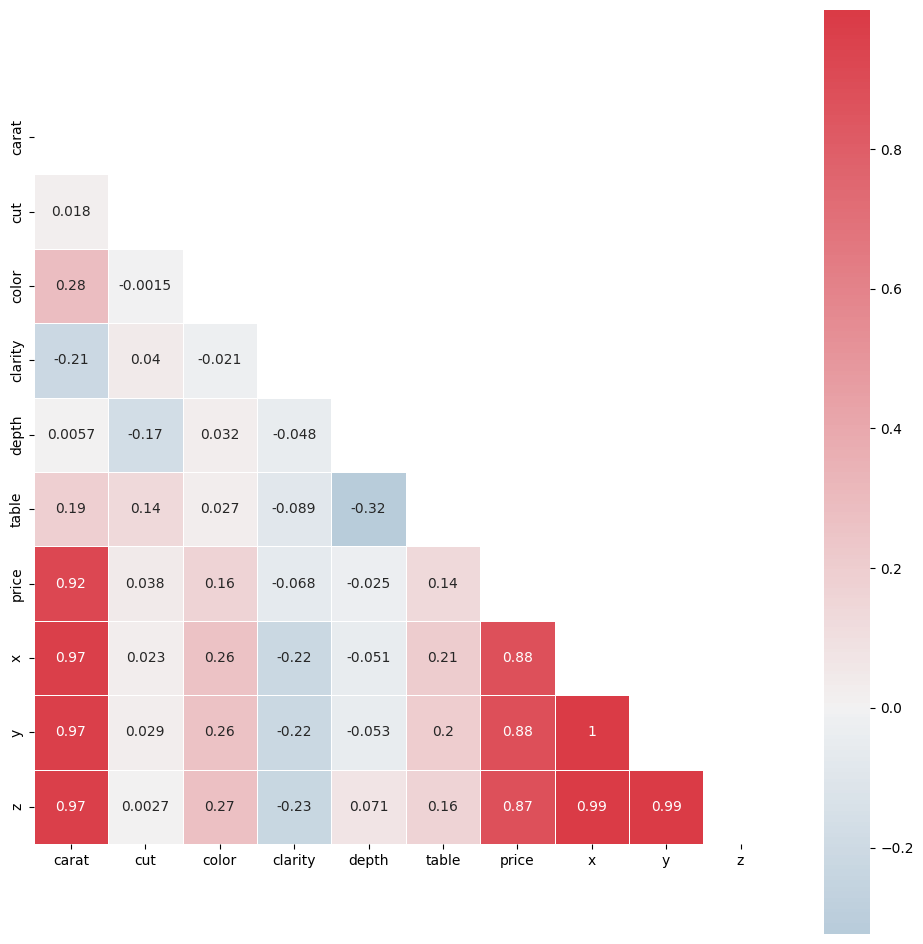

In [9]:
%matplotlib inline
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_encoded.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

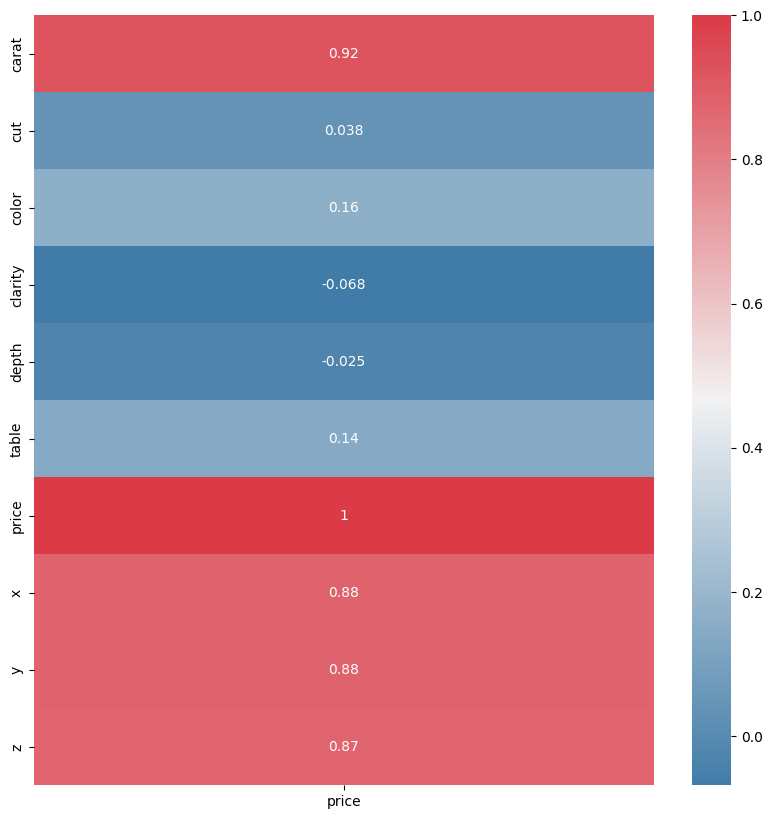

In [10]:
#COMPLETAR
target_corr = pd.DataFrame(df_encoded.corr()['price'], index=df_encoded.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

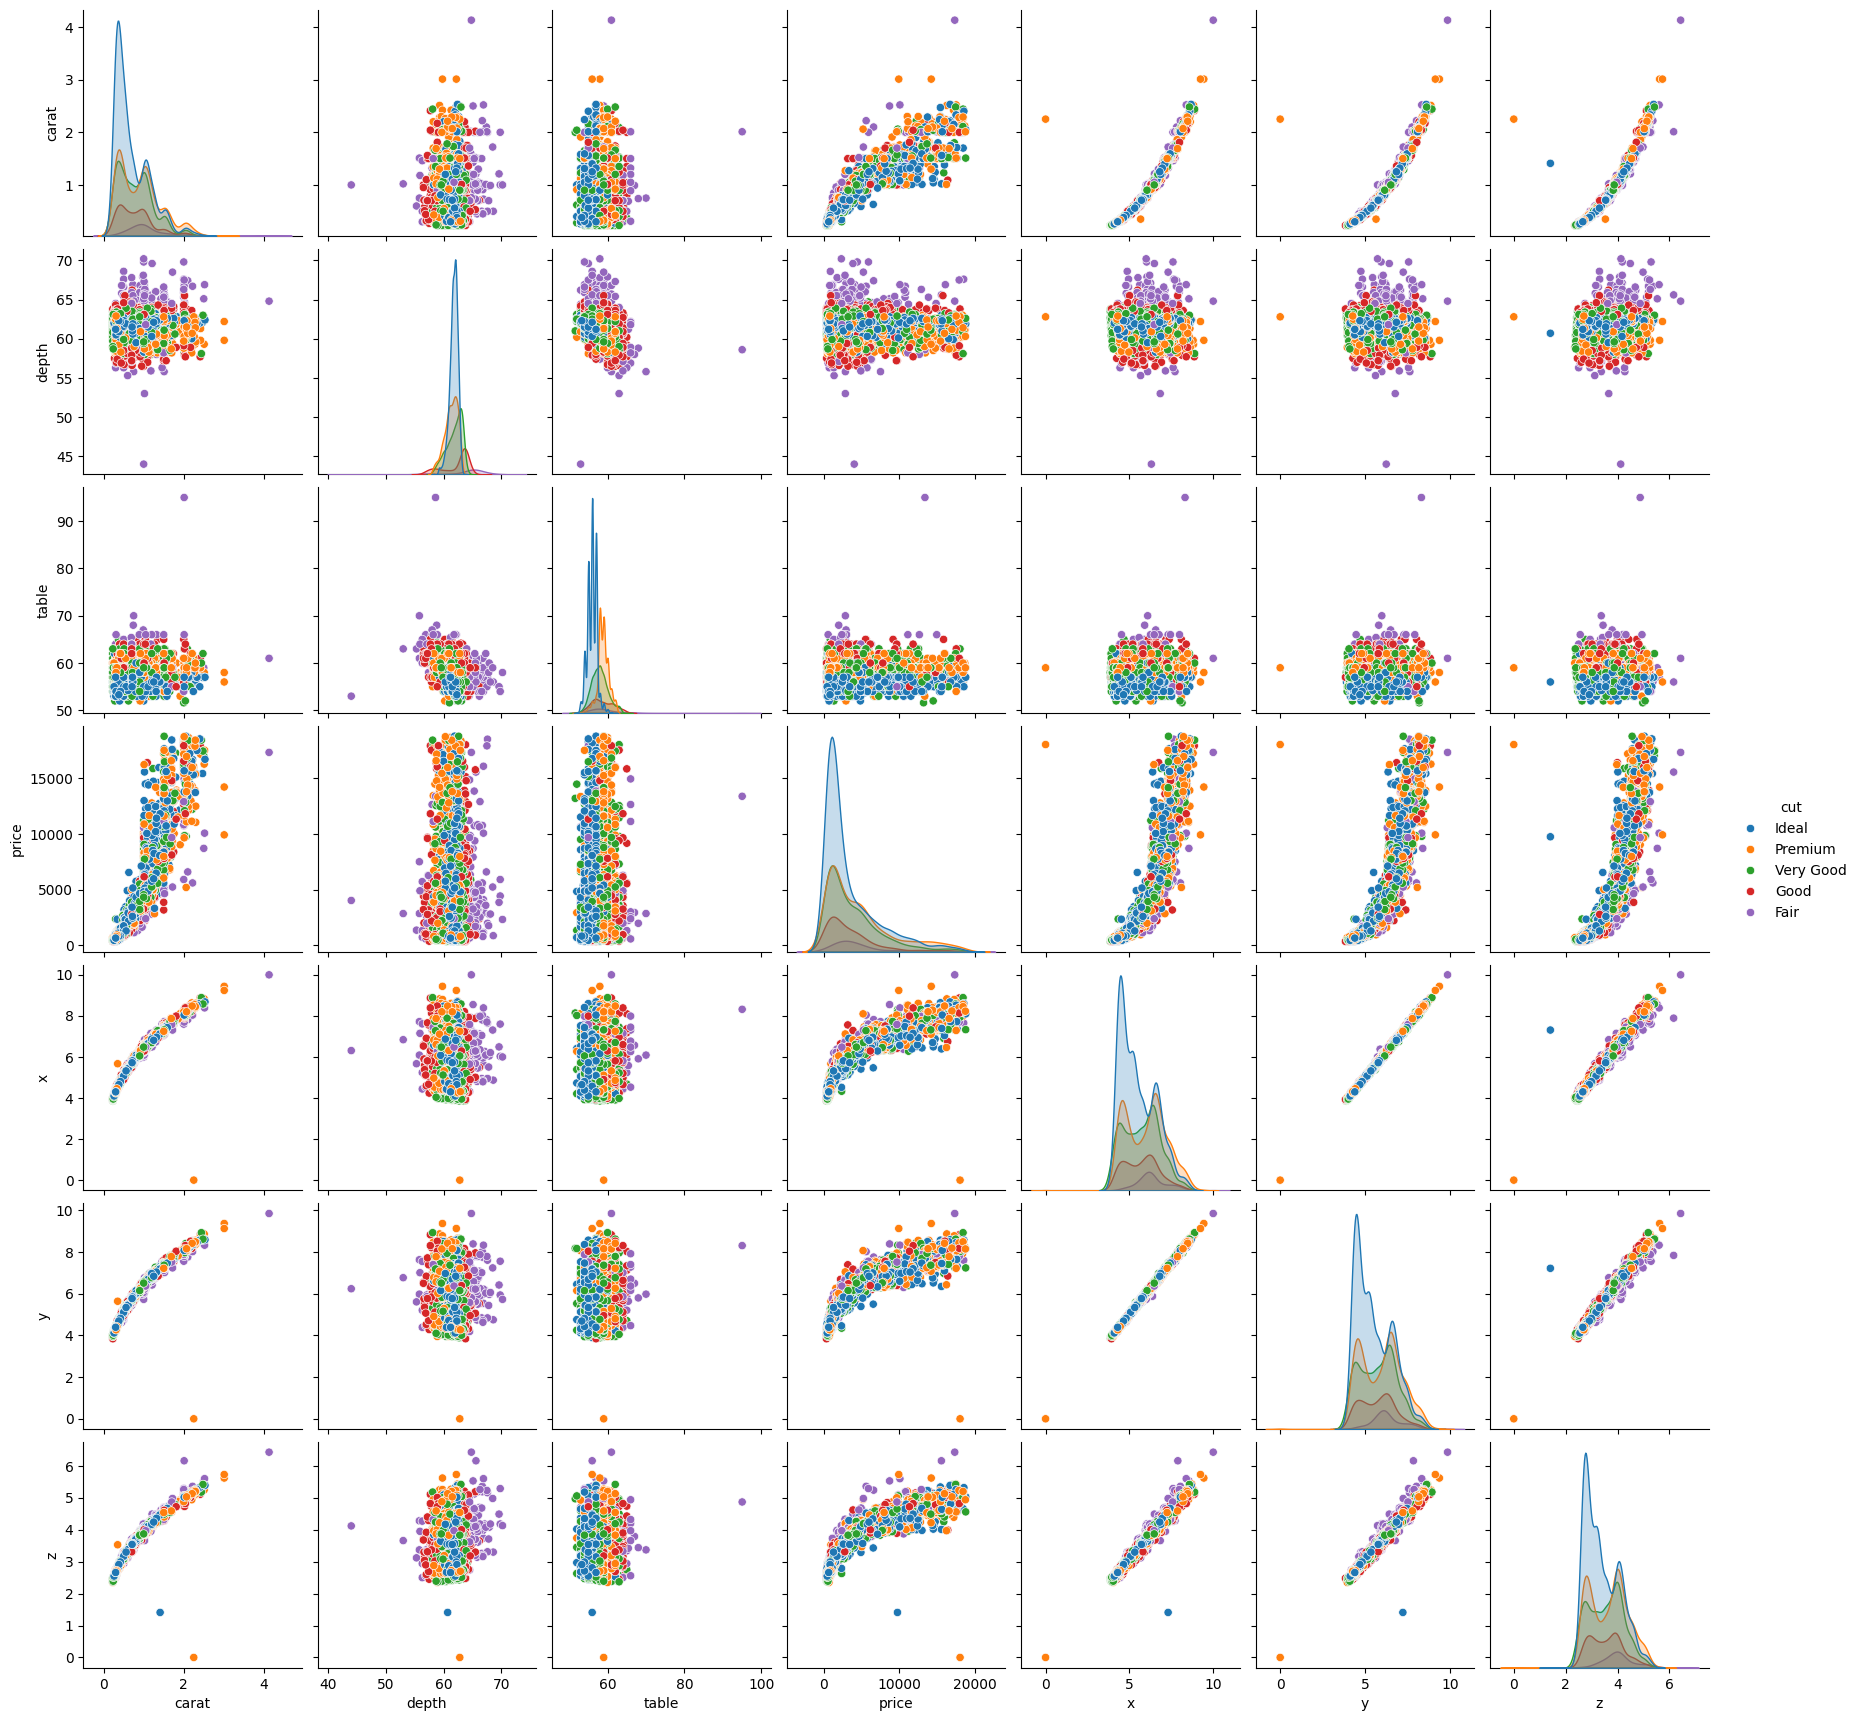

In [11]:
ax=sns.pairplot(df, hue= "cut")

##Prediccion

## Arbol de decision

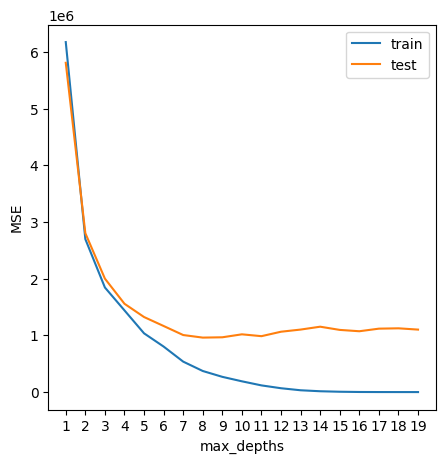

In [12]:
# Lets try tree depths
max_depths = np.arange(1, 20)
train_scores = []
test_scores = []
for i in max_depths:
    tree = DecisionTreeRegressor(max_depth=i)

    tree.fit(X_train, y_train)
    train_preds = tree.predict(X_train)
    test_preds = tree.predict(X_test)

    train_scores.append(mean_squared_error(y_train, train_preds))
    test_scores.append(mean_squared_error(y_test, test_preds))

plt.figure(figsize=(5,5))

plt.plot(max_depths, train_scores, label="train")
plt.plot(max_depths, test_scores,  label="test")
plt.xticks(max_depths)
plt.xlabel('max_depths')
plt.ylabel('MSE')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Validation Data
MSE: 949455.2263739468
RMSE: 974.3999314316205
MAE: 455.5399873866598
R^2 score: 0.9355523986049085
MAPE: 211.91909778206815
Training Data
MSE: 371960.5021640197
RMSE: 609.8856467929211
MAE: 337.87846601038063
R^2 score: 0.9768471713812652
MAPE: 219.8592534691209


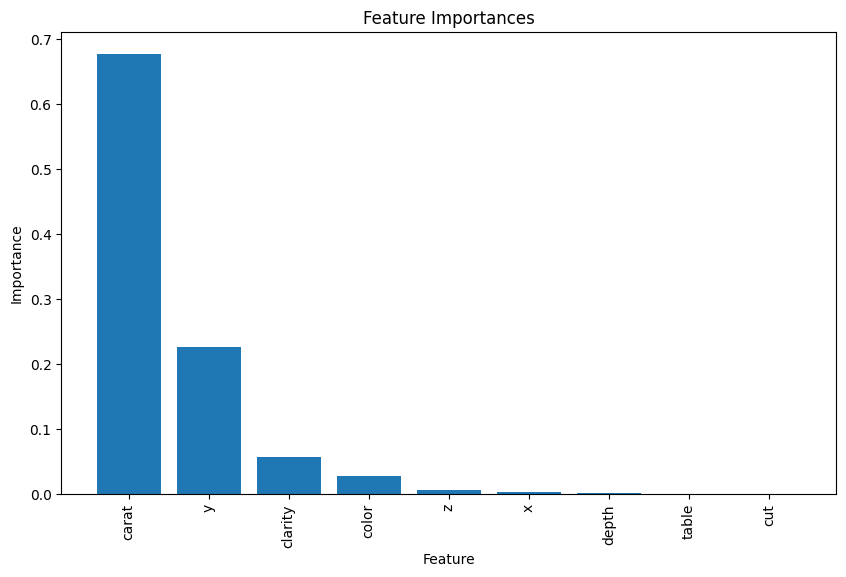

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# BEST DEPTH

tree = DecisionTreeRegressor(max_depth=8,random_state=1)
# Crear y entrenar el modelo de Extra Trees Regressor

tree.fit(X_train, y_train)

train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)

# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones
mse = mean_squared_error(y_test, test_preds)
rmse = mean_squared_error(y_test, test_preds, squared=False)  # Calcula la raíz cuadrada del MSE
mae = mean_absolute_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

#For trainin data
# Suponiendo que 'y_true' son los valores reales y 'y_pred' son las predicciones
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = mean_squared_error(y_train, train_preds, squared=False)  # Calcula la raíz cuadrada del MSE
mae1 = mean_absolute_error(y_train, train_preds)
r21 = r2_score(y_train, train_preds)

# Define una función para calcular el MAPE
#Function to calculate MAPE accuracy

# Calcula el MAPE
mape = mean_absolute_percentage_error(y_test, test_preds)
mape1 = mean_absolute_percentage_error(y_train, train_preds)

print("Validation Data")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2 score:", r2)
print("MAPE:", mape)

print("Training Data")
print("MSE:", mse1)
print("RMSE:", rmse1)
print("MAE:", mae1)
print("R^2 score:", r21)
print("MAPE:", mape1)

# Obtener las importancias de las características
importances = tree.feature_importances_

# Obtener el nombre de las características
feature_names = df_x.columns

# Ordenar las importancias y características de manera descendente
indices = importances.argsort()[::-1]
importances = importances[indices]
feature_names = feature_names[indices]

# Visualizar las importancias de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, tick_label=feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()



In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Crear un objeto KFold con k=5
kf = KFold(n_splits=5, shuffle=True, random_state=31)

# Listas para almacenar los resultados de cada fold
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []

# Iterar sobre los folds
for train_index, test_index in kf.split(df_x):
    # Obtener los conjuntos de entrenamiento y prueba para esta iteración
    X_train, X_test = df_x.iloc[train_index], df_x.iloc[test_index]
    y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]

    # Entrenar el modelo de árbol de decisión
    tree = DecisionTreeRegressor(max_depth=8, random_state=1)
    tree.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    test_preds = tree.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, test_preds)
    rmse = mean_squared_error(y_test, test_preds, squared=False)
    mae = mean_absolute_error(y_test, test_preds)
    r2 = r2_score(y_test, test_preds)


    mape = mean_absolute_percentage_error(y_test, test_preds)

    # Almacenar los resultados de esta iteración
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)

# Calcular promedio de las métricas de evaluación
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)
avg_mape = np.mean(mape_scores)

# Imprimir los resultados promedio
print("Average MSE:", avg_mse)
print("Average RMSE:", avg_rmse)
print("Average MAE:", avg_mae)
print("Average R^2 score:", avg_r2)
print("Average MAPE:", avg_mape)

Average MSE: 920024.5792747347
Average RMSE: 954.2924220106372
Average MAE: 479.06107447724787
Average R^2 score: 0.9412510613686444
Average MAPE: 217.34504188374825


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [15]:
from joblib import Parallel, delayed
import joblib

joblib.dump(tree, 'Modelo.pkl')

['Modelo.pkl']

##Pycaret

Using pycaret allowed us to check which model performs better

In [ ]:
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.223077,2,4,3,0.687023,0.078341,0.237687,0.661,0.675127,0.639191
1,0.271795,2,4,2,0.709924,0.101382,0.329410,0.696,0.703553,0.676516
2,0.248718,3,5,2,0.652672,0.147465,0.279833,0.688,0.690355,0.650078
3,0.325641,2,2,2,0.645038,0.101382,0.456661,0.743,0.747208,0.699844
4,0.171795,4,2,5,0.675573,0.124424,0.224669,0.617,0.630457,0.594090
...,...,...,...,...,...,...,...,...,...,...
4985,0.038462,2,4,7,0.698473,0.039171,0.026090,0.465,0.476142,0.452566
4986,0.025641,3,3,7,0.660305,0.170507,0.031243,0.445,0.448731,0.423017
4987,0.261538,2,6,7,0.690840,0.101382,0.305327,0.681,0.694416,0.659409
4988,0.020513,3,2,5,0.721374,0.147465,0.024463,0.431,0.433503,0.419907


In [ ]:
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.223077,2,4,3,0.687023,0.078341,0.237687,0.661,0.675127,0.639191
1,0.271795,2,4,2,0.709924,0.101382,0.329410,0.696,0.703553,0.676516
2,0.248718,3,5,2,0.652672,0.147465,0.279833,0.688,0.690355,0.650078
3,0.325641,2,2,2,0.645038,0.101382,0.456661,0.743,0.747208,0.699844
4,0.171795,4,2,5,0.675573,0.124424,0.224669,0.617,0.630457,0.594090
...,...,...,...,...,...,...,...,...,...,...
4985,0.038462,2,4,7,0.698473,0.039171,0.026090,0.465,0.476142,0.452566
4986,0.025641,3,3,7,0.660305,0.170507,0.031243,0.445,0.448731,0.423017
4987,0.261538,2,6,7,0.690840,0.101382,0.305327,0.681,0.694416,0.659409
4988,0.020513,3,2,5,0.721374,0.147465,0.024463,0.431,0.433503,0.419907


In [ ]:
from pycaret.regression import *
s = setup(df_encoded, target = 'price',fold=5,  train_size= 0.8, categorical_features  = categorical_columns, numeric_features  = numeric_columns[:-1])
#et = create_model('et')

,Description,Value
0,Session id,2474
1,Target,price
2,Target type,Regression
3,Original data shape,"(4990, 10)"
4,Transformed data shape,"(4990, 27)"
5,Transformed train set shape,"(3992, 27)"
6,Transformed test set shape,"(998, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0199,0.0015,0.0389,0.9676,0.0255,0.1779,0.3520
et,Extra Trees Regressor,0.0197,0.0015,0.0390,0.9674,0.0254,0.1506,1.7640
xgboost,Extreme Gradient Boosting,0.0207,0.0017,0.0410,0.9640,0.0268,0.1462,0.2980
rf,Random Forest Regressor,0.0212,0.0018,0.0417,0.9627,0.0275,0.1678,2.5080
gbr,Gradient Boosting Regressor,0.0243,0.0019,0.0439,0.9588,0.0289,0.2911,0.7520
dt,Decision Tree Regressor,0.0285,0.0032,0.0564,0.9314,0.0372,0.2110,0.1380
br,Bayesian Ridge,0.0415,0.0040,0.0630,0.9153,0.0418,0.9877,0.1180
lr,Linear Regression,0.0414,0.0040,0.0630,0.9151,0.0419,0.9832,1.4020
ridge,Ridge Regression,0.0464,0.0043,0.0657,0.9077,0.0447,1.2854,0.1120
lar,Least Angle Regression,0.0430,0.0045,0.0666,0.9044,0.0437,1.0104,0.2420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(best)
tuned_best= tune_model(best)

LGBMRegressor(n_jobs=-1, random_state=2474)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0324,0.0031,0.0555,0.9279,0.0383,0.4374
1,0.0379,0.0040,0.0629,0.9239,0.0422,0.5960
2,0.0350,0.0034,0.0579,0.9221,0.0397,0.6735
3,0.0356,0.0043,0.0656,0.9159,0.0435,0.5381
4,0.0331,0.0032,0.0565,0.9296,0.0381,0.4367
Mean,0.0348,0.0036,0.0597,0.9239,0.0404,0.5363
Std,0.0019,0.0005,0.0039,0.0048,0.0022,0.0917


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
